![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 23 - Outliers Detection </center>
### <center> Local Outlier Factor (LOF) </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/23_OutlierDetection/MainLOF.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Moons data:

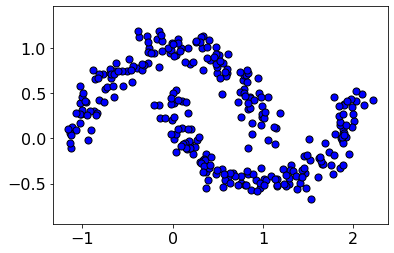

In [2]:
from sklearn.datasets import make_moons

N     = 300
mX, _ = make_moons(N, noise=0.1)

plt.figure()
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.axis('equal')
plt.show()

### Local Outlier Factor:
We assume 5% are outliers (`contamination = 0.05`)

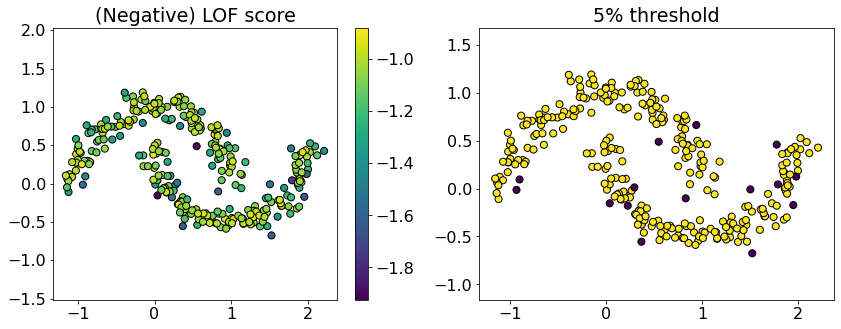

In [3]:
from sklearn.neighbors import LocalOutlierFactor

oLOF   = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
vIdx   = oLOF.fit_predict(mX)
vScore = oLOF.negative_outlier_factor_

_, vAxes = plt.subplots(1, 2, figsize=(14, 5))
h0 = vAxes[0].scatter  (mX[:,0], mX[:,1], s=50, c=vScore, edgecolor='k')
h1 = vAxes[1].scatter  (mX[:,0], mX[:,1], s=50, c=vIdx,   edgecolor='k')
_  = vAxes[0].set_title('(Negative) LOF score')
_  = vAxes[1].set_title('5% threshold')
_  = vAxes[0].axis     ('equal')
_  = vAxes[1].axis     ('equal')

plt.colorbar(h0, ax=vAxes[0])
plt.show    ()

### Boston data:

In [4]:
from sklearn.datasets import load_boston

mX, vY = load_boston(return_X_y=True)
mX.shape, vY.shape

((506, 13), (506,))

#### Linear (poly) regression:

In [5]:
from sklearn.preprocessing   import PolynomialFeatures, StandardScaler
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import mean_squared_error

N        = len(vY)
oPolyfit = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
vHatY    = cross_val_predict(oPolyfit, mX, vY, cv=KFold(N))
print(f'MSE: {mean_squared_error(vY, vHatY)}')

MSE: 12.953639672146979


#### Remove 5% outliers (using LOF):

In [6]:
vIdx = LocalOutlierFactor(n_neighbors=5, contamination=0.05).fit_predict(mX)
mX2  = mX[vIdx==1,:]
vY2  = vY[vIdx==1]

mX2.shape, vY2.shape

((480, 13), (480,))

In [7]:
N2     = len(vY2)
vHatY2 = cross_val_predict(oPolyfit, mX2, vY2, cv=KFold(N2))
print(f'MSE: {mean_squared_error(vY2, vHatY2)}')

MSE: 11.30485533289628
